# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.isnull().sum()

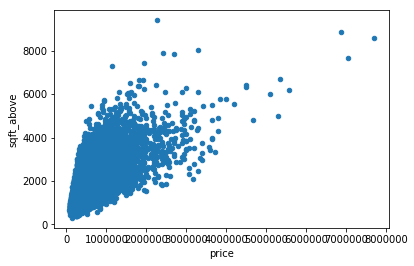

In [9]:
df.plot('price','sqft_above',kind='scatter')

In [8]:
df.loc[df['bedrooms'] > 15]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [0]:
#Split

df['split'] =

In [0]:
msk = np.random.rand(len(df)) < .8
train = df[msk]
test = df[~msk]

In [15]:
df.shape, train.shape, test.shape

((21613, 21), (17237, 21), (4376, 21))

In [0]:
xt = train[['price']]
yt = train['sqft_above']

In [22]:
mod = LinearRegression()
mod.fit(xt, yt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
m, b = mod.coef_, mod.intercept_
m, b

(array([0.00136534]), 1049.5122930985294)

In [29]:
test['sqft_above_predict'] = mod.predict(test[['price']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_above_predict
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1352.480729
5,7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2722.050980
10,1736800520,20150403T000000,662500.0,3,2.5,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,1954.048521
14,1175000570,20150312T000000,530000.0,5,2.0,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,1773.141276
16,1875500060,20140731T000000,395000.0,3,2.0,1890,14040,2.0,0,0,3,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018,1588.820686


In [0]:
test_ps = test.loc[:,(test.columns == 'price') | (test.columns == 'sqft_above')]

In [53]:
test_ps['sqft_above_predict'] = mod.predict(test[['price']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
test_ps.head()

,price,sqft_above,sqft_above_predict
0,221900.0,1180,1352.480729
5,1225000.0,3890,2722.050980
10,662500.0,1860,1954.048521
14,530000.0,1810,1773.141276
16,395000.0,1890,1588.820686


In [55]:
test_ps['Error'] = test_ps['sqft_above'] - test_ps['sqft_above_predict']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
test_ps['Abs_Error'] = abs(test_ps['sqft_above_predict'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
test_ps['Error_sq'] = test_ps['Error']**2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
test_ps.head()

,price,sqft_above,sqft_above_predict,Error,Abs_Error,Error_sq
0,221900.0,1180,1352.480729,-172.480729,1352.480729,2.974960e+04
5,1225000.0,3890,2722.050980,1167.949020,2722.050980,1.364105e+06
10,662500.0,1860,1954.048521,-94.048521,1954.048521,8.845124e+03
14,530000.0,1810,1773.141276,36.858724,1773.141276,1.358566e+03
16,395000.0,1890,1588.820686,301.179314,1588.820686,9.070898e+04


In [59]:
test_ps['Error_sq'].mean()

445121.99365189066

In [66]:
print((test_ps['Error_sq'].mean())**.5, test_ps['Abs_Error'].mean() )

667.1746350483437 1784.4611084758803


In [64]:
mean_squared_error(y_true=test_ps['sqft_above'], y_pred=test_ps['sqft_above_predict'])

445121.9936518899

In [65]:
mean_absolute_error(y_true=test_ps['sqft_above'], y_pred=test_ps['sqft_above_predict'])

524.5086333562583

In [67]:
r2_score(y_true=test_ps['sqft_above'], y_pred=test_ps['sqft_above_predict'])

0.34312745538792677

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
##### Your Code Here #####

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
##### Your Code Here #####

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
